# Double integration

In [1]:
%matplotlib notebook
from speed_regression import training_data as td
from speed_regression import imu_optimization as imu_optimization
import numpy as np
import pandas
import sklearn.svm as svm
from sklearn.externals import joblib
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
import quaternion

import algorithms.double_integration as double_integration

nano_to_sec = 1e09

## Test linear acceleration signal

<IPython.core.display.Javascript object>


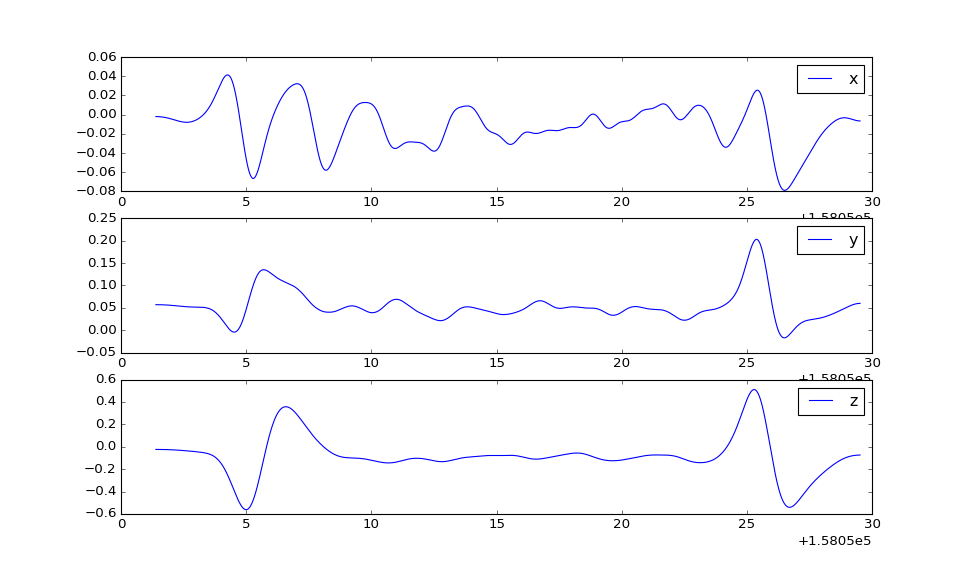

In [8]:
test_data_all = pandas.read_csv('../../data/test_line1/processed/data.csv')
linacce = test_data_all[['linacce_x', 'linacce_y', 'linacce_z']].values
time_stamp = test_data_all['time'].values / nano_to_sec

linacce = gaussian_filter1d(linacce, axis=0, sigma=50.0)
axis_names = 'xyz'
plt.figure()
for i in range(3):
    plt.subplot(311+i)
    plt.plot(time_stamp, linacce[:, i])
    plt.legend(axis_names[i])

<IPython.core.display.Javascript object>


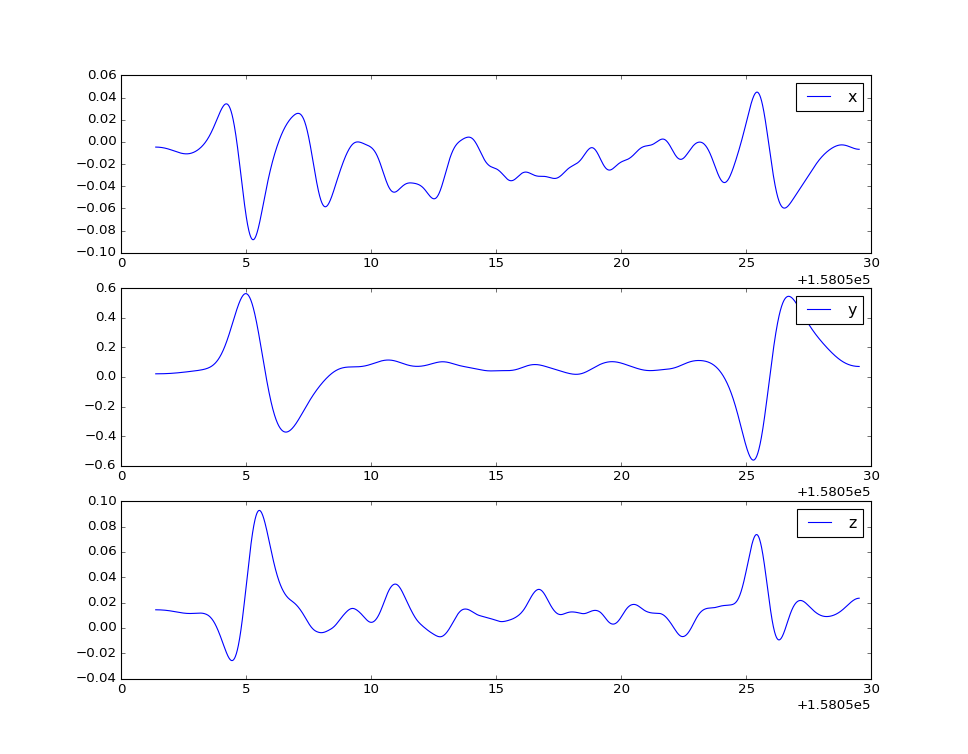

In [6]:
rotations = test_data_all[['ori_w', 'ori_x', 'ori_y', 'ori_z']].values
linacce = test_data_all[['linacce_x', 'linacce_y', 'linacce_z']].values

quats = quaternion.as_quat_array(rotations)
linacce_rot = np.array([np.dot(quaternion.as_rotation_matrix(quats[i]), linacce[i])
                        for i in range(quats.shape[0])])

linacce_rot = gaussian_filter1d(linacce_rot, axis=0, sigma=50.0)
axis_names = 'xyz'
plt.figure()
for i in range(3):
    plt.subplot(311+i)
    plt.plot(time_stamp, linacce_rot[:, i])
    plt.legend(axis_names[i])

## IMU Optimization

In [15]:
data_all = pandas.read_csv('../../data/20170126025407/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
time_stamp -= time_stamp[0]
imu_columns = ['gyro_x', 'gyro_y', 'gyro_z', 'linacce_x', 'linacce_y', 'linacce_z']
options = td.TrainingDataOption(feature='fourier', window_size=200, frq_threshold=100, sample_step=50)
speed_ind = np.arange(options.window_size_, data_all.shape[0] - 1, options.sample_step_, dtype=int)
variable_ind = speed_ind.copy()
variable_ind[-1] += 1

test_data = td.get_training_data(data_all=data_all, imu_columns=imu_columns,
                                 option=options, sample_points=speed_ind)

regressor = joblib.load('../../models/model_walk_fourier_w200_s10.svm')
predicted_speed = regressor.predict(test_data[:, :-1])

plt.figure('Speed Regression')
plt.plot(time_stamp[speed_ind], test_data[:, -1])
plt.plot(time_stamp[speed_ind], predicted_speed)
plt.legend(['Ground Truth', 'Predicted'])

FileNotFoundError: [Errno 2] No such file or directory: '../../models/model_walk_fourier_w200_s10.svm'